In [1]:
import csv
import pandas as pd
from collections import Counter
from matplotlib import pyplot
import numpy as np
import os

In [2]:
# vecs = dict()
# with open("./kmers/atchley_factors.csv", 'r') as stream:
# 	for line in stream:
# 		row = line.split(',')
# 		key = row[0]
# 		values = []
# 		for value in row[1:]:
# 			values.append(float(value))
# 		vecs[key] = values
# length = len(vecs['A'])
# labels = ['I', 'II', 'III', 'IV', 'V']

# def features(sequence):
# 	values = []
# 	for aa in sequence:
# 		values += vecs[aa]
# 	return values

In [3]:
meta = pd.read_csv("~/data/metadata.txt", sep='\t')
print(meta.head())

  sample_id   age                              race     sex cmv  \
0  HIP08653  52.0  caucasian,non-hispanic or latino  female   +   
1  HIP13276  53.0  caucasian,non-hispanic or latino    male   -   
2  HIP14114  57.0  caucasian,non-hispanic or latino  female   -   
3  HIP03370  41.0  caucasian,non-hispanic or latino    male   +   
4  HIP13015  39.0  caucasian,non-hispanic or latino    male   -   

                   hla  
0  A*01,A*02,B*07,B*08  
1  A*01,A*02,B*07,B*08  
2  A*01,A*02,B*07,B*15  
3  A*01,A*02,B*07,B*52  
4  A*01,A*02,B*07,B*57  


In [62]:
snip_size = 4
cdr3_counts = Counter()

for i in range(len(cdr3)):
    sequence = cdr3[i]
    if '*' not in sequence:
        sequence = sequence[3:(-3)]
        stop = len(sequence)-snip_size+1
        for j in range(stop):
            snip = sequence[j:j+snip_size]
            cdr3_counts[snip] += 1

#cdr3_counts

# = dict(cdr3_counts)

# for (snip, count) in cdr3_counts.items():
#     print(snip)
#     print(features(snip))
#     break
#            features()


In [64]:
len(cdr3_counts)

41856

(array([2.0307e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0247e+04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 6.2570e+03, 0.0000e+00,
        0.0000e+00, 4.4550e+03, 0.0000e+00, 0.0000e+00, 3.1400e+03,
        0.0000e+00, 2.5060e+03, 0.0000e+00, 1.9910e+03, 1.7370e+03,
        0.0000e+00, 1.3230e+03, 1.1740e+03, 1.0400e+03, 9.0700e+02,
        7.9500e+02, 6.8300e+02, 6.4400e+02, 5.8900e+02, 9.9600e+02,
        8.3100e+02, 3.7700e+02, 6.8400e+02, 6.0000e+02, 5.5100e+02,
        6.3500e+02, 5.7000e+02, 3.3000e+02, 5.7800e+02, 3.9300e+02,
        4.1900e+02, 3.5500e+02, 3.0400e+02, 3.0300e+02, 2.9900e+02,
        2.5100e+02, 2.7200e+02, 2.3200e+02, 2.2500e+02, 2.0600e+02,
        2.1600e+02, 1.6800e+02, 1.3200e+02, 1.7400e+02, 1.3800e+02,
        1.2000e+02, 1.0700e+02, 1.0400e+02, 7.8000e+01, 9.7000e+01,
        7.1000e+01, 6.8000e+01, 5.8000e+01, 5.6000e+01, 4.8000e+01,
        6.4000e+01, 4.3000e+01, 4.7000e+01, 3.30

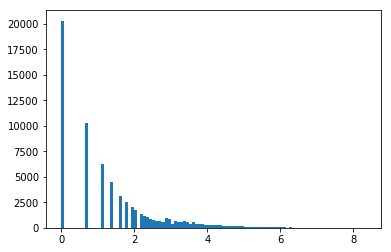

In [44]:
#%matlplotlib inline

pyplot.hist(np.log(list(dict(cdr3_counts).values())), bins=100)

In [49]:
len(d[d['templates']>1])


51508

In [50]:
len(d)

202265

In [4]:
#########################################################################################
# Author: Jared L. Ostmeyer
# Date Started: 2016-07-26
# Environment: Python3
# License: See LICENSE
# Purpose: Load dataset and create interfaces for piping the data to the model.
##########################################################################################

import csv
import numpy as np

#import lib_paths
#import atchley_factors as vector_representation

#repertoires = dict()

def load_repertoires(data_dir):
    
    meta = pd.read_csv("~/data/metadata.txt", sep='\t') 
    repertoires = dict()

    for filename in os.listdir(data_dir):
        if filename.startswith("HIP"):
            sample_id = filename[:-4]
            diagnoses_id = list(meta.loc[meta['sample_id'] == sample_id]['cmv'])[0]
            if ((diagnoses_id == '+') or (diagnoses_id == '-')):
                sequences = dict()
                sample = pd.read_csv(os.path.join(data_dir, filename))
                
                sample = sample[['amino_acid', 'templates']].groupby(['amino_acid']).sum()
                sequences = sample.to_dict()
                repertoires[sample_id] = {
                    'Diagnosis': 1 if diagnoses_id == '+' else 0,
                    'Sequences': sequences 
                }
            print(repertoires)
            break
    return repertoires




# def process_repertoires(repertoires, snip_size=6):
#   repertoires_snip = {}
#   for sample, repertoire in repertoires.items():
#     diagnosis = repertoire['Diagnosis']
#     snips = {}
#     for sequence, count in repertoire['Sequences'].items():
#       stop = len(sequence)-snip_size+1
#       for i in range(stop):
#         snip = sequence[i:i+snip_size]
#         if snip not in snips:
#           snips[snip] = count
#         else:
#           snips[snip] += count
#     repertoires_snip[sample] = {
#       'Diagnosis': diagnosis,
#       'Snips': snips
#     }

#   num_samples = len(repertoires)
#   max_snips = -1
#   num_features = snip_size*vector_representation.length

#   for sample, repertoire in repertoires_snip.items():
#     num_snips = len(repertoire['Snips'])
#     if num_snips > max_snips:
#       max_snips = num_snips

#   xs = np.zeros((num_samples, max_snips, num_features), dtype=np.float32)  # Features
#   cs = np.zeros((num_samples, max_snips), dtype=np.float32)        # Snippet count
#   ys = np.zeros((num_samples), dtype=np.float32)  # Labels

#   for i, (sample, repertoire) in enumerate(sorted(repertoires_snip.items(), key=lambda item: item[0])):
#     for j, (snip, count) in enumerate(repertoire['Snips'].items()):
#       xs[i,j,:] = vector_representation.features(snip)
#       cs[i,j] = float(count)
#     ys[i] = float(repertoire['Diagnosis'])
#   return xs, cs, ys

In [5]:
d = load_repertoires("/home/nazarov_group/data/cmv")

{'HIP13396': {'Diagnosis': 1, 'Sequences': {'templates': {'**RGRDNSPLHF': 1, '*AAGASTDTQYF': 1, '*AQAGNTIYF': 1, '*DTQYF': 5, '*EGAYTGELFF': 1, '*GAGTSGSYEQYF': 1, '*GQ*AEAFF': 1, '*GRQSPFSNQPQHF': 1, '*GVGANSPLHF': 1, '*GVQETQYF': 1, '*IRTRNTIYF': 1, '*KGYEQYF': 2, '*KKRGQPQHF': 1, '*LAEYNEQFF': 2, '*LQF': 1, '*NSRDRGSQETQYF': 1, '*PGEGQGAYGYTF': 1, '*PYTLD*QETQYF': 1, '*QGLSGNTIYF': 1, '*QLAGNGTGELFF': 1, '*RGGQETQYF': 1, '*THTDTQYF': 1, '*TLSTDTQYF': 1, '*YEQYF': 1, 'ADTQYF': 1, 'AFF': 1, 'AGGANVLTF': 2, 'AGGCTDTQYF': 2, 'AGGSNSYNSPLHF': 6, 'AGKETQYF': 1, 'AGTQYF': 1, 'AGVTDTQYF': 1, 'AGYTF': 2, 'APAAWLWDRGYGYTF': 3, 'APEAFF': 1, 'APSNQPQHF': 2, 'AQETQYF': 2, 'ASSKGRGLAEAAFTDTQYF': 1, 'C*RKETQYF': 1, 'C*TRETQYF': 1, 'CA**AGGLDYNEQFF': 1, 'CA*AHRGWHGYTF': 2, 'CA*APNTEAFF': 1, 'CA*DYGNQPQHF': 1, 'CA*ESPLEWATDTQYF': 1, 'CA*G*AKNIQYF': 2, 'CA*GDPFNYNEQFF': 1, 'CA*GEAFF': 3, 'CA*GGVTNEKLFF': 1, 'CA*GKKGRGGQPQHF': 1, 'CA*GRRSYEQYF': 1, 'CA*KPRDQPQHF': 1, 'CA*LAGEYEQYF': 1, 'CA*LGRSRHEQFF'

In [9]:
d['HIP13396']['Sequences']['templates'].values()

dict_values([1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 6, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 9, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 2, 1, 2, 6, 6, 1, 1, 1, 1, 1, 5, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 